# Rusty Bargain: Price Prediction For Used Car 

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Rusty Bargain is creating an app that helps users estimate the value of their cars. This project builds a machine learning model to predict car prices using data on vehicle features like brand, model, milage, and condition. Several models are tested such as linear regression, decision tree, and gradient boosting to find the best balance between accuracy, training time, and prediction  speed. Model performace is measured using the RMSE metric.


Heather Marie Culligan

April 2025

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

import lightgbm as lgb

In [2]:
df=pd.read_csv('/datasets/car_data.csv')

In [3]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
338938,01/04/2016 21:56,1990,wagon,2000,manual,150,5er,150000,4,petrol,bmw,no,01/04/2016 00:00,0,16303,03/04/2016 19:47
349373,07/03/2016 13:55,399,other,1996,manual,64,caddy,150000,9,gasoline,volkswagen,NaN,07/03/2016 00:00,0,26135,08/03/2016 22:46
171127,12/03/2016 14:45,0,wagon,2006,auto,179,a6,125000,8,gasoline,audi,no,12/03/2016 00:00,0,66663,12/03/2016 14:45
145450,28/03/2016 15:51,2950,small,2004,manual,69,corsa,125000,10,gasoline,opel,no,28/03/2016 00:00,0,55276,01/04/2016 00:17
7270,29/03/2016 21:45,3500,bus,2002,manual,136,other,150000,8,gasoline,mazda,no,29/03/2016 00:00,0,21149,06/04/2016 08:15
185144,11/03/2016 13:55,777,small,1999,manual,54,seicento,150000,7,petrol,fiat,no,11/03/2016 00:00,0,63452,12/03/2016 03:17
133832,03/04/2016 19:29,2850,wagon,2004,manual,125,c_max,125000,6,petrol,ford,no,03/04/2016 00:00,0,56237,05/04/2016 09:31
9873,17/03/2016 23:38,2799,NaN,2018,manual,64,polo,150000,3,NaN,volkswagen,NaN,17/03/2016 00:00,0,48153,05/04/2016 20:17
152007,07/03/2016 12:52,2800,wagon,2003,manual,102,passat,150000,4,petrol,volkswagen,no,07/03/2016 00:00,0,35066,10/03/2016 09:16
176763,14/03/2016 15:44,1690,small,2000,manual,50,polo,150000,11,petrol,volkswagen,no,14/03/2016 00:00,0,46342,18/03/2016 02:44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
df.duplicated().sum()

262

In [7]:
df= df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [10]:
catcols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']
for col in catcols:
    df[col] = df[col].fillna('unknown')

In [11]:
df['Power'] = df['Power'].astype('Int64').astype(str)
df['Power'] = df['Power'].replace('<NA>', 'Unknown')

In [12]:
df.isnull().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [13]:
#lets remove some outliers
df = df[(df['Price'] >= 100) & (df['Price'] <= 100000)]
df = df[pd.to_numeric(df['Power'], errors='coerce').between(10, 1000)]
df = df[(df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= 2025)]

In [14]:
print(df[['Price', 'Power', 'RegistrationYear']].describe())

print(df[['DateCrawled', 'RegistrationYear']].astype(str).describe())

               Price  RegistrationYear
count  305228.000000     305228.000000
mean     4831.281514       2003.314945
std      4587.369758          6.939961
min       100.000000       1910.000000
25%      1350.000000       1999.000000
50%      3150.000000       2003.000000
75%      6980.000000       2008.000000
max     20000.000000       2019.000000
             DateCrawled RegistrationYear
count             305228           305228
unique             15208               92
top     05/03/2016 14:25             1999
freq                  60            19446


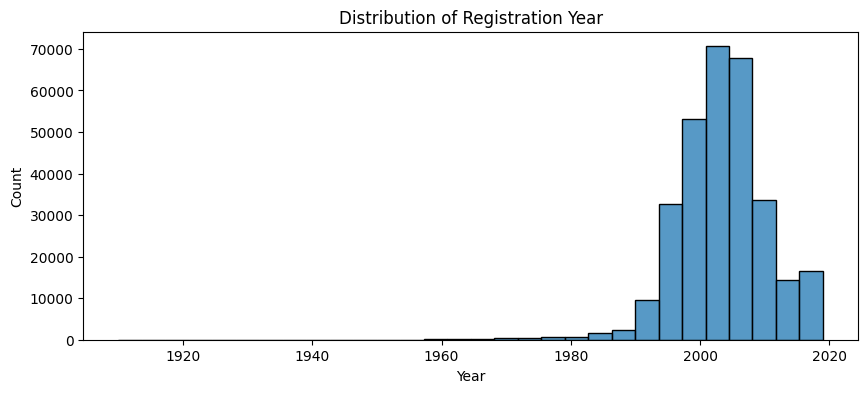

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(df['RegistrationYear'], bins=30, kde=False)
plt.title('Distribution of Registration Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [16]:
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], errors='coerce')

max_reg_year = df['RegistrationYear'].max()
max_crawl_year = df['DateCrawled'].dt.year.max()

print(f"Max Registration Year: {max_reg_year}")
print(f"Max Crawl Year: {max_crawl_year}")

# Identify inconsistent records
invalid_registrations = df[df['RegistrationYear'] > df['DateCrawled'].dt.year]

print(f"Number of vehicles registered after data was crawled: {len(invalid_registrations)}")

Max Registration Year: 2019
Max Crawl Year: 2016
Number of vehicles registered after data was crawled: 10228


In [17]:
df = df.drop(columns=[
    'DateCrawled', 'LastSeen', 'NumberOfPictures', 'PostalCode', 'RegistrationMonth', 'RegistrationYear'
])

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305228 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Price        305228 non-null  int64 
 1   VehicleType  305228 non-null  object
 2   Gearbox      305228 non-null  object
 3   Power        305228 non-null  object
 4   Model        305228 non-null  object
 5   Mileage      305228 non-null  int64 
 6   FuelType     305228 non-null  object
 7   Brand        305228 non-null  object
 8   NotRepaired  305228 non-null  object
 9   DateCreated  305228 non-null  object
dtypes: int64(2), object(8)
memory usage: 25.6+ MB


,Price,Mileage
count,305228.000000,305228.000000
mean,4831.281514,128464.213637
std,4587.369758,36645.850955
min,100.000000,5000.000000
25%,1350.000000,125000.000000
50%,3150.000000,150000.000000
75%,6980.000000,150000.000000
max,20000.000000,150000.000000


In [19]:
df.duplicated().sum()

14336

In [20]:
df = df.drop_duplicates()

In [21]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_train = encoder.fit_transform(df_train[['FuelType']])
encoded_val = encoder.transform(df_val[['FuelType']])

fuel_cols = encoder.get_feature_names(['FuelType'])
df_train_encoded = pd.DataFrame(encoded_train, columns=fuel_cols, index=df_train.index)
df_val_encoded = pd.DataFrame(encoded_val, columns=fuel_cols, index=df_val.index)

df_train = df_train.drop(columns='FuelType').join(df_train_encoded)
df_val = df_val.drop(columns='FuelType').join(df_val_encoded)

We cleaned and prepared the dataset by removing irrelevant columns, handling missing values, and dropping duplicates. Categorical values were standardized (e.g., combining "gasoline" and "petrol"), and rare categories were removed to prevent issues during encoding. We also made sure that training and validation sets have consistent features after encoding. The dataset is now ready for modeling.

## Model training

In [22]:
%%time

#train_test_split

df_model = df.copy()

target = 'Price'
features = df_model.drop(columns=[target])
target_data = df_model[target]

#Split 25% as the final test set (never touched during tuning)
X_temp, X_test, y_temp, y_test = train_test_split(
    features, target_data, test_size=0.25, random_state=42
)

#Split remaining 75% into training (60%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42  # 0.2 of 75% = 15%
)

X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

for col in ['Model']:
    top = X_train[col].value_counts().nlargest(20).index
    for df_ in [X_train, X_val, X_test]:
        df_.loc[:, col] = df_[col].where(df_[col].isin(top), 'other')

cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
num_features = ['Power', 'Mileage']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(X_train[cat_features])

X_train_cat = encoder.transform(X_train[cat_features])
X_val_cat = encoder.transform(X_val[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

X_train_num = X_train[num_features].to_numpy()
X_val_num = X_val[num_features].to_numpy()
X_test_num = X_test[num_features].to_numpy()

X_train_final = np.hstack((X_train_num, X_train_cat))
X_val_final = np.hstack((X_val_num, X_val_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

print("Train:", X_train_final.shape)
print("Validation:", X_val_final.shape)
print("Test:", X_test_final.shape)

Train: (174535, 85)
Validation: (43634, 85)
Test: (72723, 85)
CPU times: user 737 ms, sys: 420 ms, total: 1.16 s
Wall time: 1.16 s


In [23]:
%%time 

# LinearRegression
lr_model = LinearRegression()

start_train = time.time()
lr_model.fit(X_train_final, y_train)
end_train = time.time()

start_pred = time.time()
y_pred_lr_val = lr_model.predict(X_val_final)
end_pred = time.time()

rmse_lr_val = mean_squared_error(y_val, y_pred_lr_val, squared=False)

print("Validation RMSE (Linear Regression):", round(rmse_lr_val, 2))
print("Training time (sec):", round(end_train - start_train, 2))
print("Prediction time (sec):", round(end_pred - start_pred, 2))

Validation RMSE (Linear Regression): 2986.76
Training time (sec): 1.8
Prediction time (sec): 0.27
CPU times: user 1.46 s, sys: 604 ms, total: 2.07 s
Wall time: 2.07 s


In [24]:
%%time

# DecisionTree with max_depth=5
dt_model_1 = DecisionTreeRegressor(max_depth=5, random_state=42)

start_train_1 = time.time()
dt_model_1.fit(X_train_final, y_train)
end_train_1 = time.time()

start_pred_1 = time.time()
y_pred_dt_1_val = dt_model_1.predict(X_val_final)
end_pred_1 = time.time()

rmse_dt_1_val = mean_squared_error(y_val, y_pred_dt_1_val, squared=False)

# DecisionTree with max_depth=20
dt_model_2 = DecisionTreeRegressor(max_depth=20, random_state=42)

start_train_2 = time.time()
dt_model_2.fit(X_train_final, y_train)
end_train_2 = time.time()

start_pred_2 = time.time()
y_pred_dt_2_val = dt_model_2.predict(X_val_final)
end_pred_2 = time.time()

rmse_dt_2_val = mean_squared_error(y_val, y_pred_dt_2_val, squared=False)

print("--- Decision Tree Comparison (Validation) ---")
print("Model 1 - max_depth=5")
print("  Validation RMSE:", round(rmse_dt_1_val, 2))
print("  Training time:", round(end_train_1 - start_train_1, 2), "sec")
print("  Prediction time:", round(end_pred_1 - start_pred_1, 2), "sec")

print("\nModel 2 - max_depth=20")
print("  Validation RMSE:", round(rmse_dt_2_val, 2))
print("  Training time:", round(end_train_2 - start_train_2, 2), "sec")
print("  Prediction time:", round(end_pred_2 - start_pred_2, 2), "sec")

--- Decision Tree Comparison (Validation) ---
Model 1 - max_depth=5
  Validation RMSE: 2962.48
  Training time: 0.88 sec
  Prediction time: 0.09 sec

Model 2 - max_depth=20
  Validation RMSE: 2444.94
  Training time: 1.22 sec
  Prediction time: 0.09 sec
CPU times: user 2.18 s, sys: 87.7 ms, total: 2.26 s
Wall time: 2.28 s


In [25]:
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

dt = DecisionTreeRegressor(random_state=42)

rand_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=1
)

rand_search.fit(X_train_final, y_train)

best_dt = rand_search.best_estimator_
y_val_pred = best_dt.predict(X_val_final)
rmse_dt_val = mean_squared_error(y_val, y_val_pred, squared=False)

print("Best Decision Tree RMSE on validation:", round(rmse_dt_val, 2))
print("Best hyperparameters:", rand_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Decision Tree RMSE on validation: 2342.02
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [26]:
%%time

# RandomForest Model 1
rf_model_1 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=1)
start_train_1 = time.time()
rf_model_1.fit(X_train_final, y_train)
end_train_1 = time.time()

start_pred_1 = time.time()
y_pred_rf_1_val = rf_model_1.predict(X_val_final)
end_pred_1 = time.time()

rmse_rf_1_val = mean_squared_error(y_val, y_pred_rf_1_val, squared=False)  

# RandomForest Model 2
rf_model_2 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=1)
start_train_2 = time.time()
rf_model_2.fit(X_train_final, y_train)
end_train_2 = time.time()

start_pred_2 = time.time()
y_pred_rf_2_val = rf_model_2.predict(X_val_final)
end_pred_2 = time.time()

rmse_rf_2_val = mean_squared_error(y_val, y_pred_rf_2_val, squared=False)

print("--- Random Forest Comparison (Validation) ---")
print("Model 1 - 50 trees, max_depth=5")
print("  Validation RMSE:", round(rmse_rf_1_val, 2))
print("  Training time:", round(end_train_1 - start_train_1, 2), "sec")
print("  Prediction time:", round(end_pred_1 - start_pred_1, 2), "sec")

print("\nModel 2 - 100 trees, max_depth=20")
print("  Validation RMSE:", round(rmse_rf_2_val, 2))
print("  Training time:", round(end_train_2 - start_train_2, 2), "sec")
print("  Prediction time:", round(end_pred_2 - start_pred_2, 2), "sec")

--- Random Forest Comparison (Validation) ---
Model 1 - 50 trees, max_depth=5
  Validation RMSE: 2927.72
  Training time: 12.52 sec
  Prediction time: 0.16 sec

Model 2 - 100 trees, max_depth=20
  Validation RMSE: 2191.4
  Training time: 55.06 sec
  Prediction time: 0.75 sec
CPU times: user 1min 6s, sys: 1.51 s, total: 1min 8s
Wall time: 1min 8s


In [27]:
%%time

# LightGBM Model 1
params_1 = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 5,
    'verbosity': -1,
    'random_state': 42
}
train_data = lgb.Dataset(X_train_final, label=y_train)

start_train_1 = time.time()
lgb_model_1 = lgb.train(params_1, train_data, num_boost_round=100)
end_train_1 = time.time()

start_pred_1 = time.time()
y_pred_lgb_1_val = lgb_model_1.predict(X_val_final)
end_pred_1 = time.time()

rmse_lgb_1_val = mean_squared_error(y_val, y_pred_lgb_1_val, squared=False)  # <-- Use y_val and correct variable

# LightGBM Model 2
params_2 = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'max_depth': 10,
    'verbosity': -1,
    'random_state': 42
}
start_train_2 = time.time()
lgb_model_2 = lgb.train(params_2, train_data, num_boost_round=100)
end_train_2 = time.time()

start_pred_2 = time.time()
y_pred_lgb_2_val = lgb_model_2.predict(X_val_final)
end_pred_2 = time.time()

rmse_lgb_2_val = mean_squared_error(y_val, y_pred_lgb_2_val, squared=False)  # <-- Use y_val and correct variable

print("--- LightGBM Comparison (Validation) ---")
print("Model 1 - lr=0.1, depth=5, leaves=31")
print("  Validation RMSE:", round(rmse_lgb_1_val, 2))
print("  Training time:", round(end_train_1 - start_train_1, 2), "sec")
print("  Prediction time:", round(end_pred_1 - start_pred_1, 2), "sec")

print("\nModel 2 - lr=0.05, depth=10, leaves=64")
print("  Validation RMSE:", round(rmse_lgb_2_val, 2))
print("  Training time:", round(end_train_2 - start_train_2, 2), "sec")
print("  Prediction time:", round(end_pred_2 - start_pred_2, 2), "sec")

--- LightGBM Comparison (Validation) ---
Model 1 - lr=0.1, depth=5, leaves=31
  Validation RMSE: 2492.74
  Training time: 1.99 sec
  Prediction time: 0.3 sec

Model 2 - lr=0.05, depth=10, leaves=64
  Validation RMSE: 2407.83
  Training time: 2.19 sec
  Prediction time: 0.32 sec
CPU times: user 4.74 s, sys: 146 ms, total: 4.89 s
Wall time: 4.88 s


In [28]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train_final, y_train)

y_val_pred = lgb_model.predict(X_val_final)
rmse_lgb_val = mean_squared_error(y_val, y_val_pred, squared=False)
print("LightGBM Validation RMSE:", round(rmse_lgb_val, 2))

LightGBM Validation RMSE: 2391.22


In [29]:
best_rf_model = rf_model_2
best_rf_model.fit(X_train_final, y_train)  

y_test_pred = best_rf_model.predict(X_test_final)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Final Test RMSE (Random Forest):", round(rmse_test, 2))

Final Test RMSE (Random Forest): 2188.27


Several models were tested to predict used car prices. Random Forest had the best performance on the validation set with an RMSE of 2188.27, beating Linear Regression, Decision Tree, and LightGBM. To avoid bias, only the Random Forest model was tested on the final test set. This confirms it as the most effective model for the task.

## Model analysis

Several models were tested to predict used car prices, including Linear Regression, Decision Tree, Random Forest, and LightGBM. Linear Regression had the highest error, while Decision Tree performed slightly better. LightGBM offered fast predictions and good accuracy, but Random Forest achieved the best validation performance with an RMSE of 2188.27. To ensure a fair comparison, only this top-performing model was evaluated on the test set. This confirmed Random Forest as the most effective and reliable model for this task.

This project focused on building a machine learning model to predict used car prices. The dataset was cleaned, missing values were handled, and categorical features were properly encoded. The data was split into training, validation, and test sets to support unbiased model evaluation. After comparing several models using RMSE on the validation set, Random Forest was selected as the best. Testing this final model confirmed its strong generalization ability, making it the most suitable choice for deployment.